### We can see whether there are relationships between 'Annual Income' and 'Spending Habits' of Individuals

    Load Data

In [56]:
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


    Check Missing Values

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [58]:
nr, nc = df.shape
print('rows ', nr, 'columns ', nc)

rows  200 columns  5


    Preprocessing

In [59]:
#Convert 'Gender' to binary
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})

In [60]:
#Select Features X - 'Annual Income' and 'Spending Score'
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [61]:
#Scale Features (Standardize) for better performance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

    Determine Optimal Number of Clusters using Elbow Method
The Elbow Method helps us find this optimal k value. Here’s how it works:
1. We iterate over a range of k values, typically from 1 to n (where n is a hyper-parameter you choose).

2. For each k, we calculate the Within-Cluster Sum of Squares (WCSS). This tells us how spread out the data points are within each cluster.

3. We plot a graph with k on the X-axis and WCSS on the Y-axis.

4. Identifying the Elbow Point: As we increase kkk, the WCSS typically decreases because we’re creating more clusters, which tend to capture more data variations. However, there comes a point where adding more clusters results in only a marginal decrease in WCSS.

- Before the elbow: Increasing kkk significantly reduces WCSS, indicating that new clusters effectively capture more of the data’s variability.

- After the elbow: Adding more clusters results in a minimal reduction in WCSS, suggesting that these extra clusters may not be necessary and could lead to overfitting.

- Inertia is the sum of squared distances of each data point to its closest cluster center. It’s essentially the total squared error of the clustering.



    KMeans algorithm
- 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is "greedy k-means++". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.

- n_init : 'auto' or int
Number of times the k-means algorithm is run with different centroid seeds. The final results is the best output of n_init consecutive runs in terms of inertia. Several runs are recommended for sparse high-dimensional problems.

- max_iter : int, default=300
Maximum number of iterations of the k-means algorithm for a single run.

- random_state : int, RandomState instance or None, default=None
Determines random number generation for centroid initialization. Use an int to make the randomness deterministic.

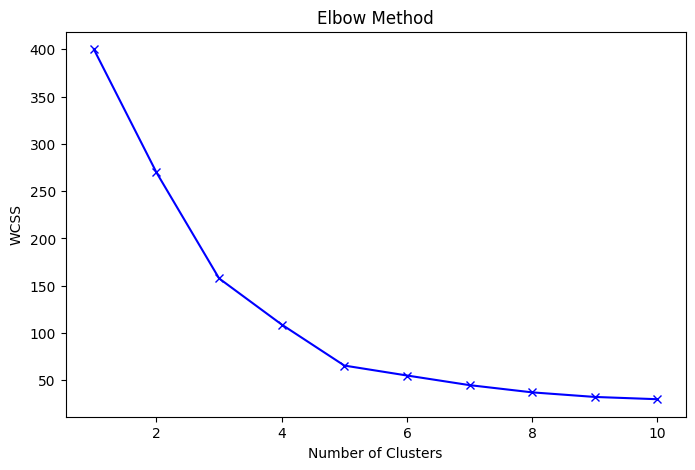

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

#Plot the Elbow Graph
plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, 'bx-')  #b=colour, x=marker, -=linestyle
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


Number of ideal clusters = 5

    Apply K-Means Clustering

In [63]:
#Define Model
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)

#Fit, Predict and create 'Clusters' column in df
df['Cluster'] = kmeans.fit_predict(X_scaled)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,2
2,3,0,20,16,6,4
3,4,0,23,16,77,2
4,5,0,31,17,40,4


    Visualize Customer Segments

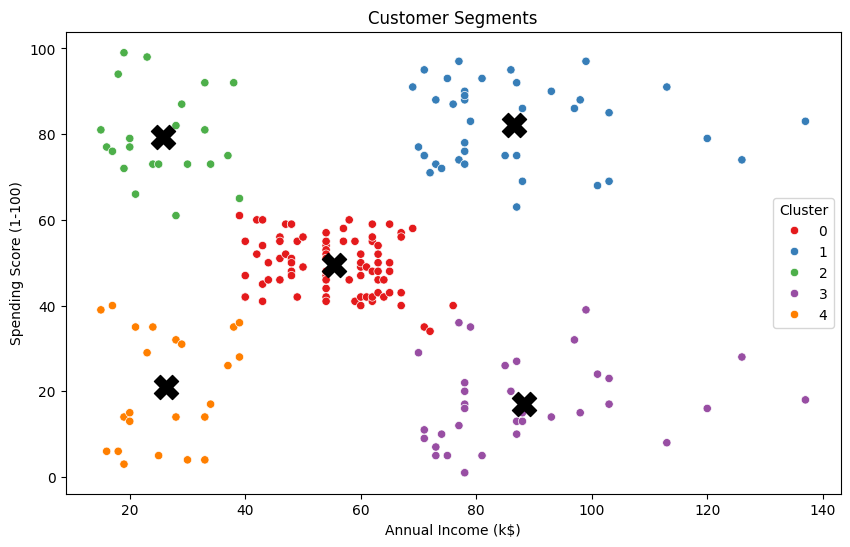

In [64]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='Set1')

plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0],
            kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1],
            s=300, c='black', marker='X', label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


    Summary
Cluster	Description
- 0	High-income, low spenders (Cautious buyers)
- 1	Medium-income, medium spenders (Standard customers)
- 2	Low-income, low spenders (Frugal shoppers)
- 3	Low-income, high spenders (Impulsive buyers)
- 4	High-income, high spenders (Luxury shoppers)

### Now we can see whether there are relationships between 'Age and 'Gender' on spending habits

    Update feture selection to include age and gender
We can observe whether,
- Does gender influence spending habits?
- Are older customers grouped differently from younger ones?
- Do we get more refined segments compared to the previous approach?

In [65]:
Z = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [66]:
#Scale Features (Standardize) for better performance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Z_scaled = scaler.fit_transform(Z)

     Recalculate Optimal Number of Clusters

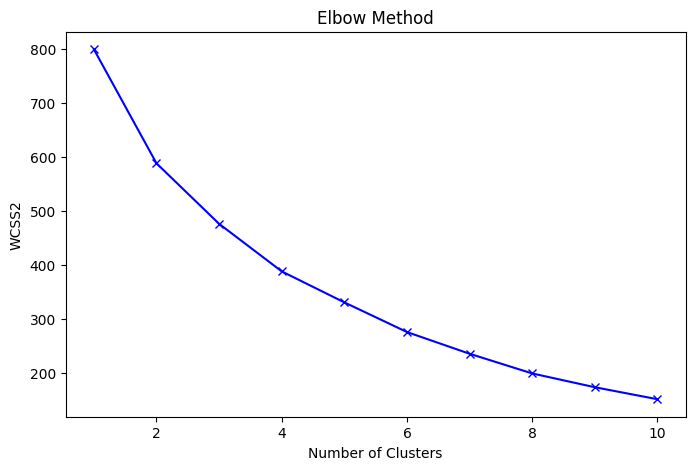

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss2 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(Z_scaled)
    wcss2.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss2, 'bx-')  #b=colour, x=marker, -=linestyle
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS2')
plt.title('Elbow Method')
plt.show()

Number of Ideal CLusters  = 4

    Apply K-Means CLustering with New Features

In [69]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster_New'] = kmeans.fit_predict(Z_scaled)

# Check the new clusters
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster_New
0,1,1,19,15,39,4,1
1,2,1,21,15,81,2,1
2,3,0,20,16,6,4,0
3,4,0,23,16,77,2,2
4,5,0,31,17,40,4,0


Text(0, 0.5, 'Spending Score (1-100)')

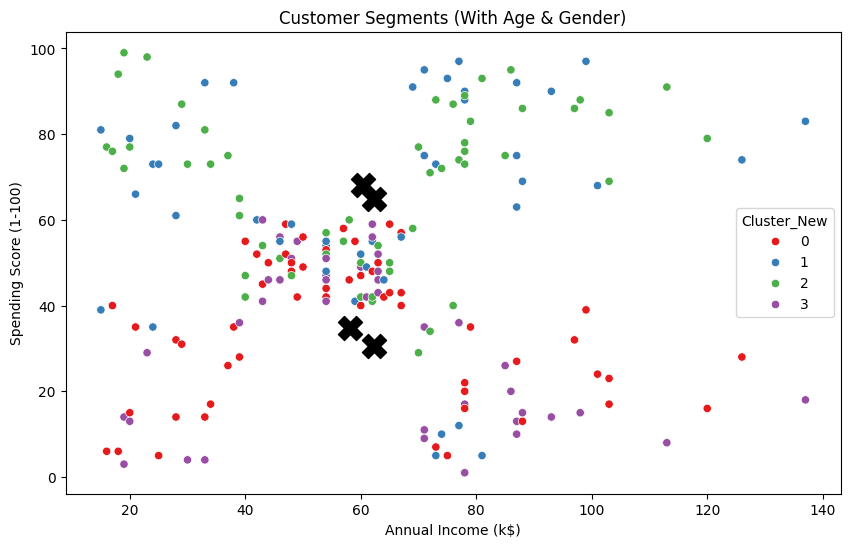

In [72]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster_New'], palette='Set1')
plt.scatter(kmeans.cluster_centers_[:, 2] * scaler.scale_[2] + scaler.mean_[2], 
            kmeans.cluster_centers_[:, 3] * scaler.scale_[3] + scaler.mean_[3], 
            s=300, c='black', marker='X', label='Centroids')
plt.title('Customer Segments (With Age & Gender)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

    Summary
Adding 'Age' and "Gender' does not improve segmentation. The groups are less distinct and as a result does not provide usefull information.